This lab on Linear Regression is a python adaptation of p. 109-119 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Written by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).


# 3.6.1 Importing Libraries

In [1]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm

We'll start by importing the data from [Boston.csv](http://www.science.smith.edu/~jcrouser/SDS293/data/Boston.csv) into a pandas dataframe:

In [2]:
df = pd.read_csv('http://www.science.smith.edu/~jcrouser/SDS293/data/Boston.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 3.6.2 Simple Linear Regression

Now let's fit a simple linear model (OLS - for "ordinary least squares" method) with ${\tt medv}$ as the response and ${\tt lstat}$ as the predictor:

In [3]:
lm = sm.OLS.from_formula('medv ~ lstat', df)
result = lm.fit()

To get detailed information about the model, we can print the results of a call to the ${\tt .summary()}$ method:

In [4]:
print( result.summary() )

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           5.08e-88
Time:                        11:24:07   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Want individual attributes? You can access them independently like this:

In [5]:
result.rsquared, result.fvalue, result.params.Intercept, result.params.lstat

(0.5441462975864799, 601.6178711098955, 34.55384087938308, -0.9500493537579922)

For a complete list of attributes and methods of a ${\tt RegressionResults}$ object, see: http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.RegressionResults.html?highlight=regressionresults

Now let's try making some predictions using this model. First, we'll set up a dataframe containing the ${\tt lstat}$ values for which we want to predict a response:

In [6]:
new = pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns=['Intercept', 'lstat'])

Now we just call the ${\tt .predict()}$ method:

In [7]:
result.predict(new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

Technically those are the right prediction values, but maybe it would be good to have the confidence intervals along with them. Let's write a little helper function to get that and package it all up:

In [8]:
def predict(res, new):
    
    # Get the predicted values
    fit = pd.DataFrame(res.predict(new), columns=['fit'])
    
    # Get the confidence interval for the model (and rename the columns to something a bit more useful)
    ci = res.conf_int().rename(columns={0: 'lower', 1: 'upper'})
    
    # Now a little bit of matrix multiplication to get the confidence intervals for the predictions
    ci = ci.T.dot(new.T).T
    
    # And finally wrap up the confidence intervals with the predicted values
    return pd.concat([fit, ci], axis=1)

In [9]:
predict(result, new)

,fit,lower,upper
0,29.803594,28.317716,31.289472
1,25.053347,23.186975,26.919720
2,20.303101,18.056234,22.549967


Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.

In [10]:
import seaborn as sns

We will now plot ${\tt medv}$ and ${\tt lstat}$ along with the least squares regression line using the ${\tt regplot()}$ function. We can define the color of the fit line using ${\tt line\_kws}$ ("line keywords"):

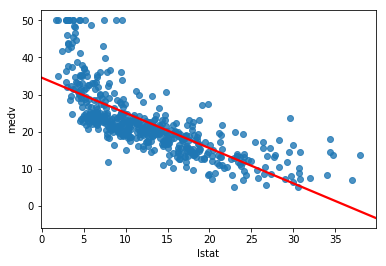

In [11]:
sns.regplot('lstat', 'medv', df, line_kws = {"color":"r"}, ci=None)

We can also plot the residuals against the fitted values:

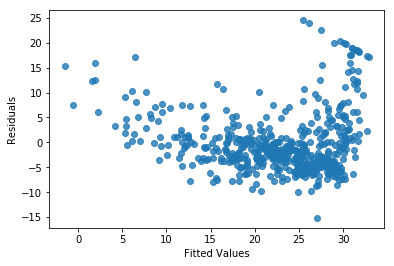

In [12]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

Perhaps we want normalized residuals instead?

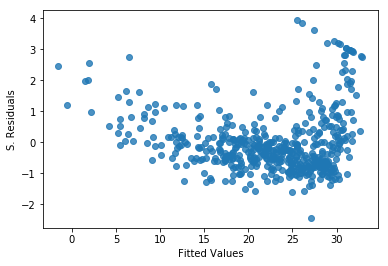

In [13]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

We can also look for points with high leverage:

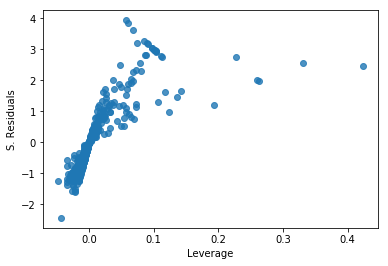

In [14]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

#  3.6.3 Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the ${\tt from\_formula()}$ function. The syntax ${\tt from\_formula(y∼x1+x2+x3)}$ is used to fit a model with three predictors, $x1$, $x2$, and $x3$. The ${\tt summary()}$ function now outputs the regression coefficients for all the predictors.

In [15]:
model = sm.OLS.from_formula('medv ~ lstat + age', df)
result = model.fit()
print result.summary()

SyntaxError: invalid syntax (<ipython-input-15-e3311dabddec>, line 3)

The Boston data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [ ]:
# All columns (except medv, which is our response)
model = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv'])), df)
result = model.fit()
print result.summary()

Note that we used the syntax ${\tt .join(df.columns.difference(['medv']))}$ to exclude the response variable above. We can use the same napproach to perform a regression using just a subset of the predictors? For example, in the above regression output, ${\tt age}$ and ${\tt indus}$ have a high p-value. So we may wish to run a regression excluding these predictors:

In [ ]:
# All columns (except medv)
model = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv', 'age', 'indus'])), df)
result = model.fit()
print result.summary()

# 3.6.4 Interaction Terms

It is easy to include interaction terms in a linear model using the ${\tt .from\_formula()}$ function. The syntax ${\tt lstat:black}$ tells Python to include an interaction term between ${\tt lstat}$ and ${\tt black}$. The syntax ${\tt lstat*age}$ simultaneously includes ${\tt lstat}$, ${\tt age}$, and the interaction term ${\tt lstat×age}$ as predictors; it is a shorthand for ${\tt lstat+age+lstat:age}$.

In [ ]:
print sm.OLS.from_formula('medv ~ lstat*age', df).fit().summary()

# 3.6.5 Non-linear Transformations of the Predictors

The ${\tt .from\_formula()}$ function can also accommodate non-linear transformations of the predictors. For instance, given a predictor ${\tt X}$, we can create a predictor ${\tt X^\wedge2}$ using ${\tt np.square(X)}$. We now perform a regression of ${\tt medv}$ onto ${\tt lstat}$ and ${\tt lstat^\wedge 2}$.

In [ ]:
lm.fit2 = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', df).fit()
print lm.fit2.summary()

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the ${\tt anova\_lm()}$ function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [ ]:
lm.fit = sm.OLS.from_formula('medv ~ lstat', df).fit()
print sm.stats.anova_lm(lm.fit, lm.fit2)

Here Model 0 represents the linear submodel containing only one predictor, ${\tt lstat}$, while Model 1 corresponds to the larger quadraticmodel that has two predictors, ${\tt lstat}$ and ${\tt lstat2}$. The ${\tt anova\_lm()}$ function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. 

The F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors ${\tt lstat}$ and ${\tt lstat2}$ is far superior to the model that only contains the predictor ${\tt lstat}$. This is not surprising, since earlier we saw evidence for non-linearity in the relationship between ${\tt medv}$ and ${\tt lstat}$. 

If we type:

In [ ]:
fitted_values = pd.Series(lm.fit2.fittedvalues, name="Fitted Values")
residuals = pd.Series(lm.fit2.resid, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

then we see that when the ${\tt lstat2}$ term is included in the model, there is little discernible pattern in the residuals.

In order to create a cubic fit, we can include a predictor of the form ${\tt np.power(x, 3))}$. However, this approach can start to get cumbersome for higher order polynomials. A better approach involves using list comprehension inside a ${\tt .join()}$. For example, the following command produces a fifth-order polynomial fit:

In [ ]:
sm.OLS.from_formula('medv ~ ' + '+'.join(['np.power(lstat,' + str(i) + ')' for i in range(1,6)]), df).fit().summary()

Of course, we are in no way restricted to using polynomial transformations of the predictors. Here we try a log transformation.

In [ ]:
sm.OLS.from_formula('medv ~ np.log(rm)', df).fit().summary()

# 3.6.6 Qualitative Predictors

We will now examine the [${\tt Carseats}$](http://www.science.smith.edu/~jcrouser/SDS293/data/Carseats.csv) data that we talked about earlier in class. We will attempt to predict ${\tt Sales}$ (child car seat sales) in 400 locations based on a number of predictors.

In [ ]:
df2 = pd.read_csv('Carseats.csv')
df2.head()

The ${\tt Carseats}$ data includes qualitative predictors such as ${\tt Shelveloc}$, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor ${\tt Shelveloc}$ takes on three possible values, ${\tt Bad}$, ${\tt Medium}$, and ${\tt Good}$.

Given a qualitative variable such as ${\tt Shelveloc}$, Python generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [ ]:
sm.OLS.from_formula('Sales ~ Income:Advertising+Price:Age + ' + "+".join(df2.columns.difference(['Sales'])), df2).fit().summary()

To learn how to set other coding schemes (or _contrasts_), see: http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/contrasts.html

# Getting Credit
To get credit for this lab, please reply to the prompt posted to the [#lab2](https://sds293.slack.com/messages/C76KRHW14) Slack channel.